# Data preprocessing

Sometimes we need to preprocess data. `momepy` has a set of tools to edit given geometry to make it fit for morphological analysis.

This guide introduces a selection of tools to preprocess the street network and eliminate unwanted gaps in the network and fix its topology.

In [12]:
import momepy
import geopandas as gpd

from shapely.geometry import LineString

## Close gaps

The first issue which may happen is the network which is disconnected. The endpoints do not match. Such a network would result in incorrect results of any graph-based analysis. `momepy.close_gaps` can fix the issue by snapping nearby endpoints to a midpoint between the two.

In [10]:
l1 = LineString([(1, 0), (2, 1)])
l2 = LineString([(2.1, 1), (3, 2)])
l3 = LineString([(3.1, 2), (4, 0)])
l4 = LineString([(4.1, 0), (5, 0)])
l5 = LineString([(5.1, 0), (6, 0)])

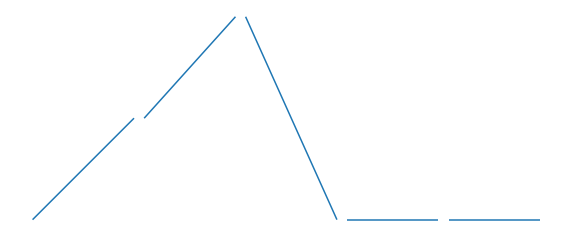

In [11]:
df = gpd.GeoDataFrame(['a', 'b', 'c', 'd', 'e'], geometry=[l1, l2, l3, l4, l5])
df.plot(figsize=(10, 10)).set_axis_off()

All LineStrings above need to be fixed.

In [12]:
df.geometry = momepy.close_gaps(df, .25)

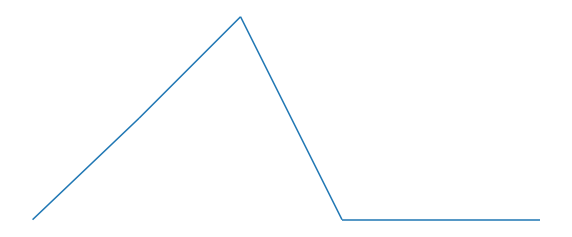

In [13]:
df.plot(figsize=(10, 10)).set_axis_off()

Now we can compare how the fixed network looks compared to the original one.

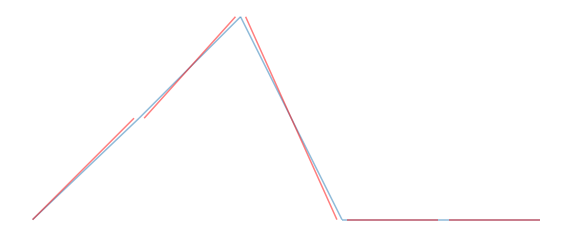

In [15]:
ax = df.plot(alpha=.5, figsize=(10, 10))
gpd.GeoDataFrame(geometry=[l1, l2, l3, l4, l5]).plot(ax=ax, color='r', alpha=.5)
ax.set_axis_off()

## Remove false nodes

A very common issue is incorrect topology. LineString should end either at road intersections or in dead-ends. However, we often see geometry split randomly along the way. `momepy.remove_false_nodes` can fix that.

We will use `mapclassify.greedy` to highlight each segment.

In [5]:
from mapclassify import greedy

In [4]:
df = gpd.read_file(momepy.datasets.get_path('tests'), layer='broken_network')

<AxesSubplot:>

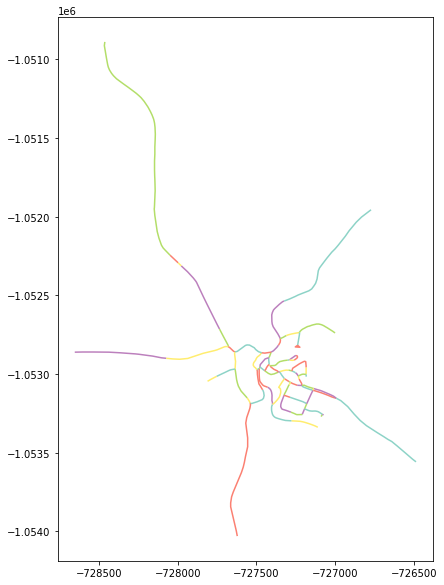

In [11]:
df.plot(greedy(df), categorical=True, figsize=(10, 10), cmap="Set3")

You can see that the topology of the network above is not as it should be.

For a reference, let's check how many geometries we have now:

In [14]:
len(df)

83

Okay, 83 is a starting value. Now let's remove false nodes.

In [13]:
fixed = momepy.remove_false_nodes(df)

<AxesSubplot:>

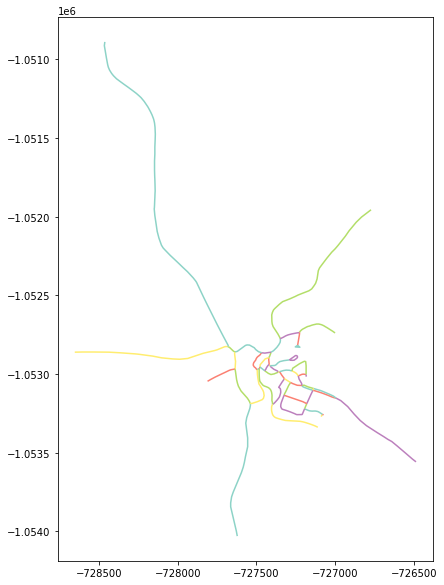

In [16]:
fixed.plot(greedy(fixed), categorical=True, figsize=(10, 10), cmap="Set3")

From the figure above, it is clear that the network is now topologically correct. How many features are there now?

In [17]:
len(fixed)

56

We have been able to represent the same network using 27 features less.

## Extend lines

In some cases, like in generation of enclosures, we may want to close some gaps by extending existing LineStrings until they meet other geometry.

In [25]:
l1 = LineString([(0, 0), (2, 0)])
l2 = LineString([(2.1, -1), (2.1, 1)])
l3 = LineString([(3.1, 2), (4, 0.1)])
l4 = LineString([(3.5, 0), (5, 0)])
l5 = LineString([(2.2, 0), (3.5, 1)])

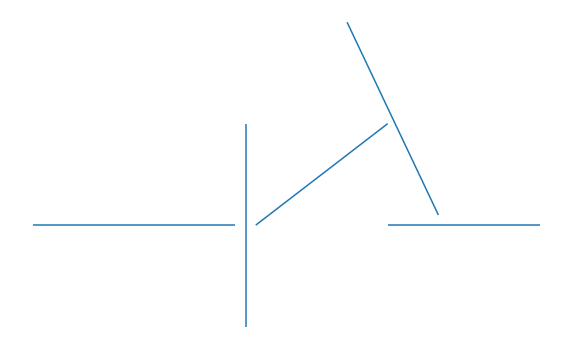

In [26]:
df = gpd.GeoDataFrame(['a', 'b', 'c', 'd', 'e'], geometry=[l1, l2, l3, l4, l5])
df.plot(figsize=(10, 10)).set_axis_off()

The situation above is typical. The network is almost connected, but there are gaps. Let's extend geometries and close them. Note that we cannot use `momepy.close_gaps` in this situation as we are nor snapping endpoints to endpoints.

In [29]:
extended = momepy.extend_lines(df, tolerance=.2)

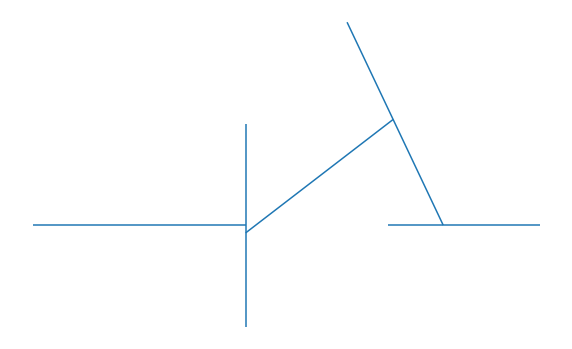

In [35]:
extended.plot(figsize=(10, 10)).set_axis_off()

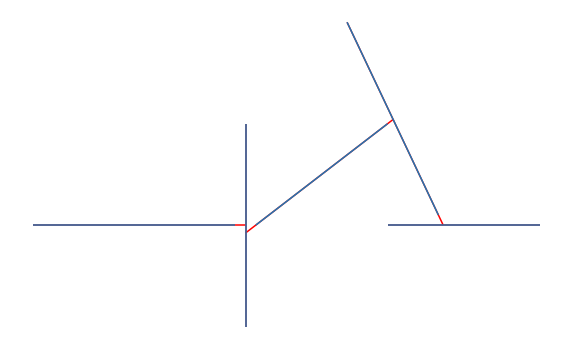

In [34]:
ax = extended.plot(figsize=(10, 10), color='r')
df.plot(ax=ax)
ax.set_axis_off()

The figures above are self-explanatory. However, remember that the extended network is not topologically correct and is not suitable for network analysis directly. For `enclosures` it is perfect though.